In [1]:
%matplotlib inline

import osmnx as ox
import networkx as nx

ox.config(use_cache=True)

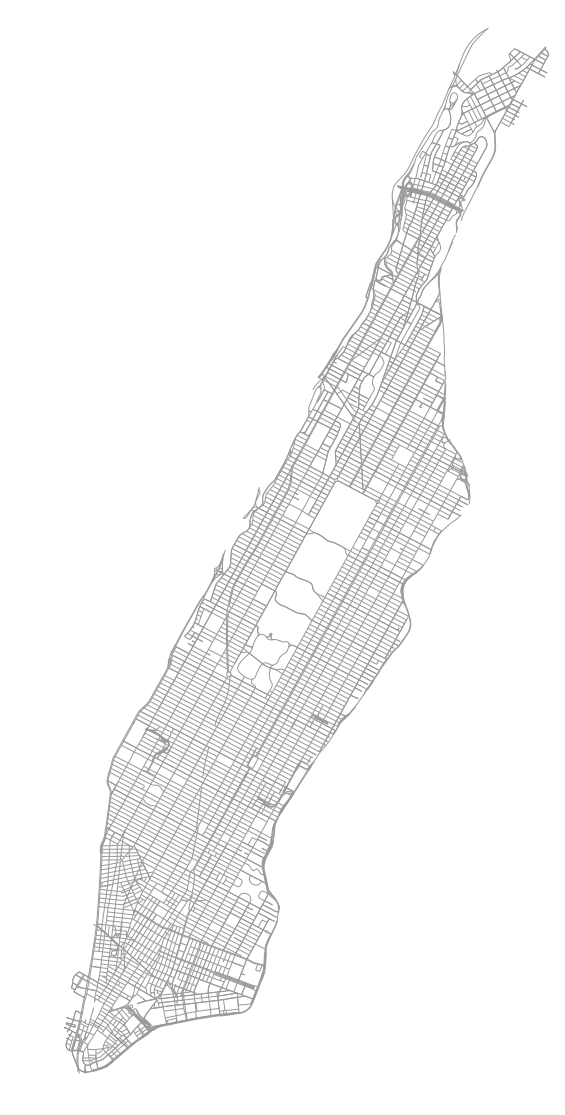

In [2]:
places = ["Manhattan, New York"]
G5 = ox.graph_from_place(places, clean_periphery=False, network_type='drive')
G5_projected = ox.project_graph(G5)
fig, ax = ox.plot_graph(G5_projected, fig_height=20, node_size=0)

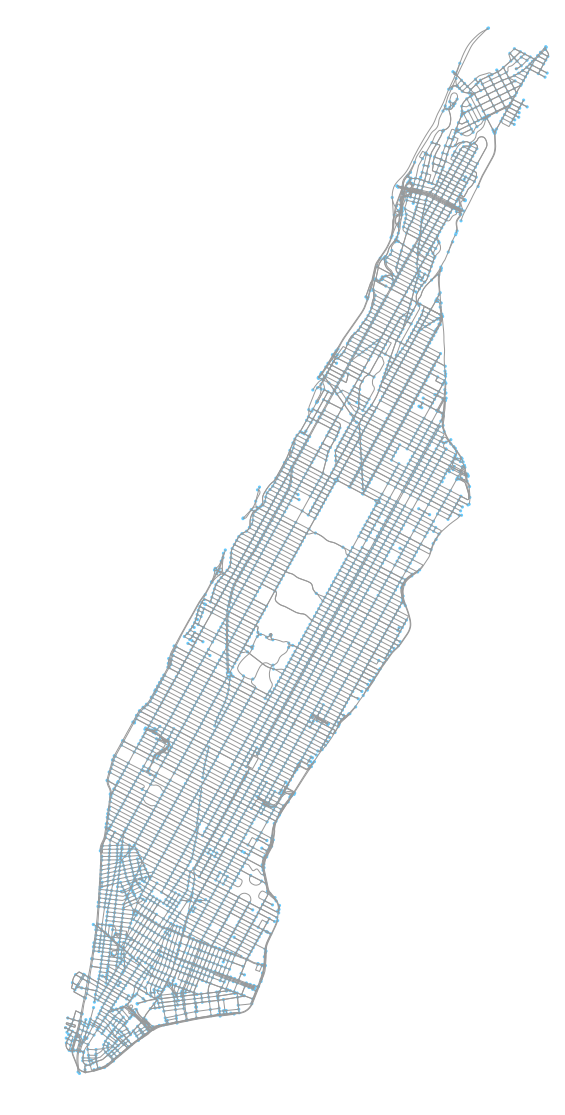

In [5]:
fig, ax = ox.plot_graph(G5_projected, fig_height=20, node_size=10)

In [6]:
node_data = G5_projected.nodes(data=True)

In [7]:
origin_point = (40.7992369, -73.962876)
destination_point = (40.8013253, -73.9540275)
origin_node = ox.get_nearest_node(G5, origin_point)
destination_node = ox.get_nearest_node(G5, destination_point)
origin_node, destination_node

(42421737, 42431203)

In [67]:
node_data[100]

(42424098,
 {'highway': 'traffic_signals',
  'lat': 40.7612328,
  'lon': -73.9639047,
  'osmid': '42424098',
  'ref': nan,
  'x': 587451.60516934528,
  'y': 4512768.4768141489})

In [71]:
import random

In [89]:
nx.shortest_path??

In [4]:
def edge_dist(road_type):
    if road_type == "motorway":
        return .5
    elif road_type == "primary":
        return .85
    else:
        return 1

In [5]:
G5_modified = G5_projected.copy()

for start, end, _, data in G5_modified.edges_iter(None, True, True):
    new_weight = edge_dist(data['highway']) * data["length"]
    data.update(new_weight=new_weight)

In [24]:
from collections import defaultdict

node_names = defaultdict(set)

i = 0
for edge, _, name in G5_modified.edges_iter(data='name'):
    i+=1
#     if i>100:break
    if isinstance(name, str):
        node_names[edge].add(name)
    elif isinstance(name, list):
        for n in name:
            node_names[edge].add(n)

4353

In [8]:
G5_modified.edges(data=True)

[(42421728,
  42432736,
  {'highway': 'secondary',
   'length': 86.00096978847245,
   'name': 'Central Park West',
   'new_weight': 86.00096978847245,
   'oneway': False,
   'osmid': 195743153}),
 (42421728,
  42435337,
  {'geometry': <shapely.geometry.linestring.LineString at 0x2113df2c390>,
   'highway': 'secondary',
   'length': 85.58245497046394,
   'name': 'Central Park West',
   'new_weight': 85.58245497046394,
   'oneway': False,
   'osmid': 195743153}),
 (42421728,
  42421731,
  {'geometry': <shapely.geometry.linestring.LineString at 0x2113df2a9b0>,
   'highway': 'secondary',
   'length': 137.861973054828,
   'name': 'West 106th Street',
   'new_weight': 137.861973054828,
   'oneway': False,
   'osmid': [420625565, 420625573, 5668966]}),
 (42421731,
  42437916,
  {'highway': 'residential',
   'length': 84.59593627749258,
   'name': 'Manhattan Avenue',
   'new_weight': 84.59593627749258,
   'oneway': False,
   'osmid': 5671485}),
 (42421731,
  42432737,
  {'highway': 'residentia

In [7]:
G5_modified.nodes(data=True)

[(42421728,
  {'highway': 'traffic_signals',
   'lat': 40.7980472,
   'lon': -73.96004,
   'osmid': '42421728',
   'ref': nan,
   'x': 587729.35665455484,
   'y': 4516859.0270689027}),
 (42421731,
  {'highway': 'traffic_signals',
   'lat': 40.798645,
   'lon': -73.9614743,
   'osmid': '42421731',
   'ref': nan,
   'x': 587607.57342485804,
   'y': 4516923.9536821311}),
 (42421737,
  {'highway': 'traffic_signals',
   'lat': 40.7992369,
   'lon': -73.962876,
   'osmid': '42421737',
   'ref': nan,
   'x': 587488.55019145994,
   'y': 4516988.2598536853}),
 (42421741,
  {'highway': 'traffic_signals',
   'lat': 40.8004313,
   'lon': -73.9657046,
   'osmid': '42421741',
   'ref': nan,
   'x': 587248.37035306217,
   'y': 4517118.0294734156}),
 (42421745,
  {'highway': 'traffic_signals',
   'lat': 40.8014007,
   'lon': -73.9679942,
   'osmid': '42421745',
   'ref': nan,
   'x': 587053.96052313899,
   'y': 4517223.3649709234}),
 (42421749,
  {'highway': 'traffic_signals',
   'lat': 40.8016434,
  

In [ ]:
origin_node, destination_node = 3300, 3836
origin_node, destination_node = 915, 3545
origin_node, destination_node = 811, 3693
origin_node, destination_node = 91, 3038
origin_node, destination_node = 2342, 2563

2847 3246


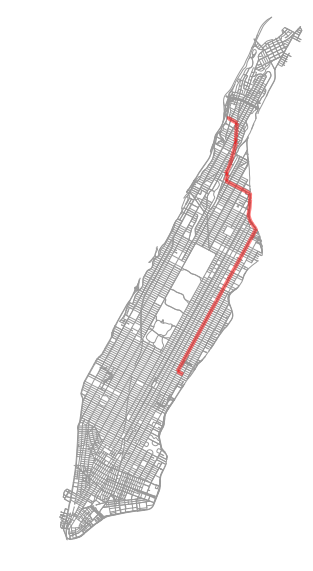

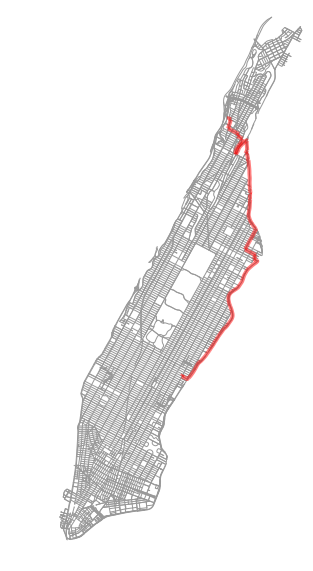

In [177]:
random1 = random.randint(0, 4000)
random2 = random.randint(0, 4000)

print(random1, random2)

# random1, random2 = 2342, 2563

origin_node = node_data[random1][0]
destination_node = node_data[random2][0]


# find the shortest path between origin and destination nodes
route = nx.shortest_path(G5_modified, origin_node, destination_node, weight='length')

fig, ax = ox.plot_graph_route(G5_modified, 
                              route, 
                              origin_point=origin_point, 
                              destination_point=destination_point, 
                              fig_height=10,
                              node_size=1)

route = nx.shortest_path(G5_projected, origin_node, destination_node, weight='new_weight')

fig, ax = ox.plot_graph_route(G5_projected, 
                              route, 
                              origin_point=origin_point, 
                              destination_point=destination_point, 
                              fig_height=10,
                              node_size=1)

In [12]:
import pandas as pd

In [12]:
data = pd.read_csv("C:/Users/Sanchez/Desktop/green_tripdata_2016-01.csv", 
                   usecols=['Trip_distance', 
                            'Pickup_longitude',
                            'Pickup_latitude', 
                            'Dropoff_longitude', 
                            'Dropoff_latitude'])

data.head(10)

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Trip_distance
0,-73.928642,40.680611,-73.924278,40.698044,1.46
1,-73.952675,40.723175,-73.923920,40.761379,3.56
2,-73.971611,40.676105,-74.013161,40.646072,3.79
3,-73.989502,40.669579,-74.000648,40.689034,3.01
4,-73.964729,40.682854,-73.940720,40.663013,2.55
5,-73.891144,40.746456,-73.867744,40.742111,1.37
6,-73.896675,40.746197,-73.886192,40.745689,0.57
7,-73.953354,40.803558,-73.949150,40.794121,1.01
8,-73.994064,40.702816,-73.971573,40.679726,2.46
9,-73.914131,40.756641,-73.917549,40.739658,1.61


In [13]:
data = pd.read_csv("C:/Users/Sanchez/Desktop/yellow_tripdata_2016-01.csv", nrows=100)#, 
#                    usecols=['Trip_distance', 
#                             'Pickup_longitude',
#                             'Pickup_latitude', 
#                             'Dropoff_longitude', 
#                             'Dropoff_latitude'])

data.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8
5,2,2016-01-01 00:00:00,2016-01-01 00:18:30,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.0,0.0,0.3,20.3
6,2,2016-01-01 00:00:00,2016-01-01 00:26:45,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.0,0.0,0.3,27.3
7,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.0,0.0,0.3,10.3
8,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.0,0.0,0.3,19.3
9,2,2016-01-01 00:00:02,2016-01-01 00:11:08,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.0,0.0,0.3,12.8


In [14]:
one_trip = data.loc[41, :]
print(one_trip)
origin_point = one_trip.Pickup_latitude, one_trip.Pickup_longitude
destination_point = one_trip.Dropoff_latitude, one_trip.Dropoff_longitude
origin_node = ox.get_nearest_node(G5, origin_point)
destination_node = ox.get_nearest_node(G5, destination_point)
print(origin_node, destination_node)

# find the shortest path between origin and destination nodes
route = nx.shortest_path(G5, origin_node, destination_node, weight='length')

VendorID                                   1
tpep_pickup_datetime     2016-01-01 00:00:21
tpep_dropoff_datetime    2016-01-01 00:17:30
passenger_count                            1
trip_distance                            0.7
pickup_longitude                    -73.8941
pickup_latitude                      40.6366
RatecodeID                                 1
store_and_fwd_flag                         Y
dropoff_longitude                   -73.8925
dropoff_latitude                     40.6348
payment_type                               2
fare_amount                               11
extra                                    0.5
mta_tax                                  0.5
tip_amount                                 0
tolls_amount                               0
improvement_surcharge                    0.3
total_amount                            12.3
Name: 41, dtype: object


AttributeError: 'Series' object has no attribute 'Pickup_latitude'

In [23]:
data = pd.DataFrame([d[2] for d in G5.edges(data=True)])#.highway.value_counts()

In [34]:
pd.Series([v for v in data.highway.values if isinstance(v, str)]).value_counts()

residential       3186
secondary         3019
primary           1688
unclassified       654
tertiary           514
motorway_link      267
motorway           142
trunk              122
primary_link        25
secondary_link      22
tertiary_link       12
trunk_link           9
living_street        2
dtype: int64

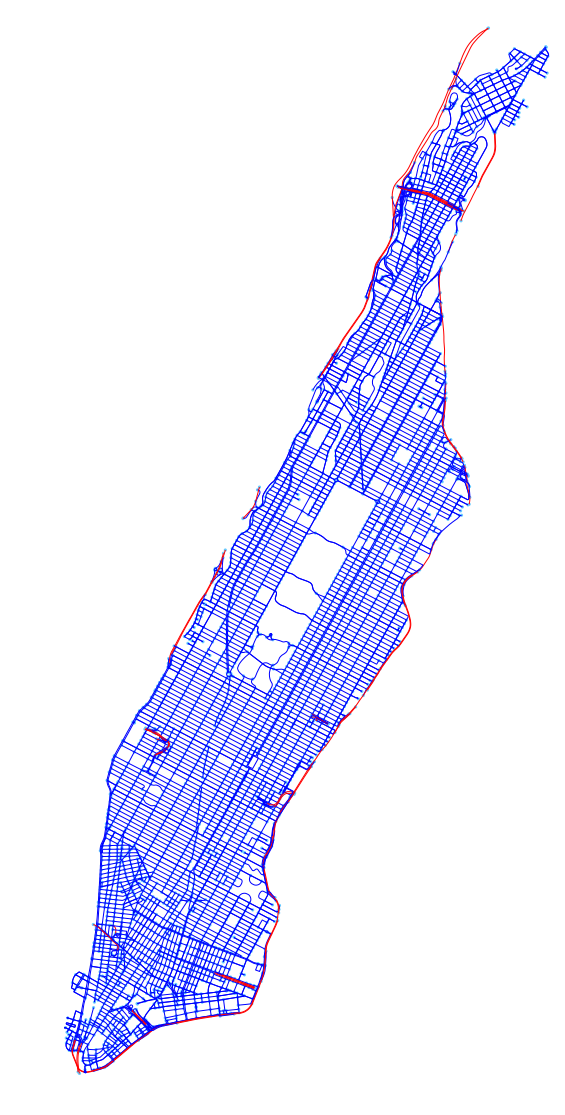

In [166]:
street_types = ['motorway']
# street_types = ['residential']
# street_types = ['primary', 'motorway_link', "motorway"]

ec = ['r' if data['highway'] in street_types else 'b' for u, v, key, data in G5_modified.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G5_modified, fig_height=20, node_size=10, edge_color=ec)

In [ ]:
cache = {}
cache[(G5.nodes()[2], G5.nodes()[6])] = intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6])

%timeit cache[(G5.nodes()[2], G5.nodes()[6])]

In [ ]:
ms_per_route = .134
total_routes = 1000000000000
cores = 64 # Use multiprocessing
total_machines = 50
total_hours_without_cache = ms_per_route*total_routes/1000/60/cores/total_machines/60
total_hours_without_cache

In [ ]:
11.6*50*.70

It would probably cost about $4000 all said and done. That means we should just take a sample of the data.

Because all we care about is relative counts of the number of times a taxi passes through an intersection, we can make a rough estimate of how many samples we will need.

In [ ]:
intersections = 4000
intersections_per_trip = 10
min_counts_in_intersection = 100
percent_counts_in_min_intersection = 1/intersections * .001
total_intersection_counts = min_counts_in_intersection/percent_counts_in_min_intersection
trips_to_process = total_intersection_counts/intersections_per_trip
trips_to_process

In [ ]:
ms_per_route = 6
total_routes = 40000000
cores = 128 # Use multiprocessing
total_machines = 1
total_hours_without_cache = ms_per_route*total_routes/1000/60/cores/total_machines/60
total_hours_without_cache

This would cost $1.50 and would probably get us the results we need.

This shows that a cache would be great if we had to process the full dataset, but with the smaller dataset, it won't make a large enough impact for it to be worth making a full precomputed cache. Instead, we will just memoize the results.

In [ ]:
%%timeit
m = {}
intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6], m)

In [ ]:
%%timeit
intersections_passed_through(G5, G5.nodes()[2], G5.nodes()[6], m)

In [211]:
m = {}

In [10]:
from scipy import spatial
from collections import defaultdict

def intersections_passed_through(G, start, stop, m):
    path = m.get((start, stop), None)
    if path:
        return path
    if start == stop:
        return []
    path = nx.shortest_path(G, start, stop, weight='new_weight')
    if len(path) <= 2:
        return []
    m[(start, stop)] = path
    return path

def count_intersection_crosses(green_trip_data, G, GP, m):
    """
    green_trip_data: file path to green taxi trip data
    G: Graph of Manhattan
    m: cache
    """
    i = 0

    intersection_counts = defaultdict(int)
    node_data = GP.nodes(data=True)
    node_points = [(d["lat"], d["lon"]) for _, d in node_data]
    kdtree = spatial.KDTree(node_points, leafsize=1)

    with open(green_trip_data) as trip_data:
        for trip in trip_data:
            i+=1
            if i>5000000:break
            t = trip.split(",")[5:9]
            try:
                t = [float(lat_long) for lat_long in t]
                start, stop = (t[1], t[0]), (t[3], t[2])
                start_node = node_data[kdtree.query(start)[1]][0]
                stop_node = node_data[kdtree.query(stop)[1]][0]
                route = intersections_passed_through(G, start_node, stop_node, m)
                for p in route:
                    intersection_counts[p] += 1
            except (ValueError, IndexError, nx.NetworkXNoPath):
                pass
    return intersection_counts


def count_intersection_crosses_yellow(yellow_trip_data, G, GP, m):
    """
    green_trip_data: file path to green taxi trip data
    G: Graph of Manhattan
    m: cache
    """
    i = 0

    intersection_counts = defaultdict(int)
    node_data = GP.nodes(data=True)
    node_points = [(d["lat"], d["lon"]) for _, d in node_data]
    kdtree = spatial.KDTree(node_points, leafsize=1)

    with open(yellow_trip_data) as trip_data:
        for trip in trip_data:
            i+=1
#             if i>50:break
            t = trip.split(",")[5:11]
            try:
                start, stop = (float(t[1]), float(t[0])), (float(t[5]), float(t[4]))
                start_node = node_data[kdtree.query(start)[1]][0]
                stop_node = node_data[kdtree.query(stop)[1]][0]
                route = intersections_passed_through(G, start_node, stop_node, m)
                for p in route:
                    intersection_counts[p] += 1
            except (ValueError, IndexError, nx.NetworkXNoPath):
                pass
    return intersection_counts

In [ ]:
%%time
intersection_counts = count_intersection_crosses("C:/Users/Sanchez/Desktop/green_tripdata_2016-01.csv", G5, G5_projected, m)

In [214]:
%%time
intersection_counts = count_intersection_crosses_yellow("C:/Users/Sanchez/Desktop/yellow_tripdata_2016-01.csv", G5, G5_modified, m)

Wall time: 7h 12min 13s


In [215]:
intersection_counts

defaultdict(int,
            {42428493: 246566,
             42440721: 296943,
             42434352: 61102,
             42440729: 131010,
             42440737: 143463,
             42440743: 111507,
             42431470: 45782,
             42439323: 55545,
             42436944: 18249,
             42439006: 75322,
             42439001: 214766,
             42440754: 512123,
             42431482: 502639,
             42437830: 505419,
             42437826: 567609,
             370898426: 611808,
             42423549: 611805,
             42451712: 266459,
             42454391: 670938,
             42457401: 191160,
             42423051: 483254,
             370894980: 48935,
             370895809: 48920,
             588455698: 155720,
             42423307: 359754,
             370892861: 498548,
             370893397: 499682,
             370893396: 499658,
             42453613: 505580,
             42437354: 421833,
             42455396: 266728,
             42453160:

In [220]:
max_val = max(intersection_counts.values())
colors = [str(round(1-(val/max_val)**.9, 2)) for key, val in intersection_counts.items()]
colors[:10]

['0.66', '0.59', '0.9', '0.81', '0.79', '0.83', '0.92', '0.91', '0.97', '0.88']

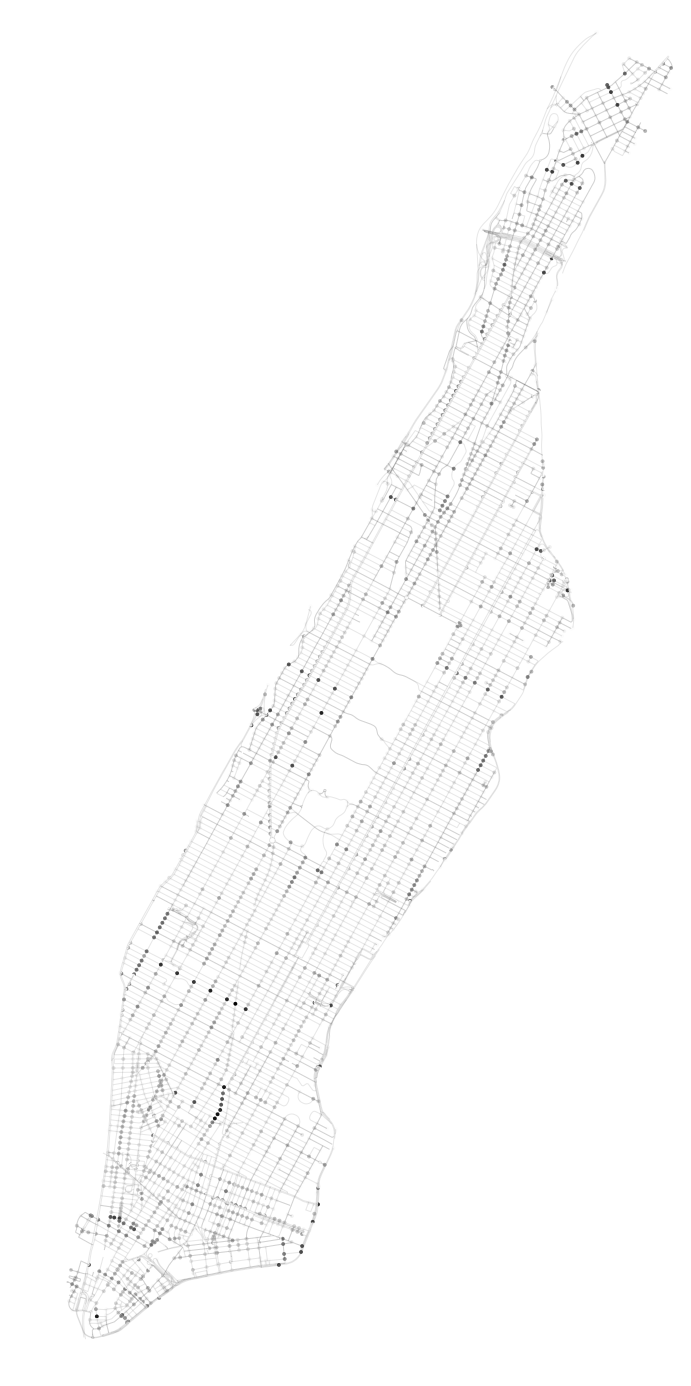

In [221]:
fig, ax = ox.plot_graph(G5_modified, fig_height=25, node_size=15, node_color=colors, edge_color=".1", edge_alpha=.1, save=True)

In [46]:
import pickle

In [219]:
pickle.dump(intersection_counts, open("intersection_counts_yellow_updated.pkl", "wb"))

In [ ]:
data = pickle.load(open("intersection_counts.pkl", "rb"))

In [ ]:
import json

In [ ]:
!wc -l C:/Users/Sanchez/Desktop/green_tripdata_2016-01.csv

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f count_intersection_crosses count_intersection_crosses("C:/Users/Sanchez/Desktop/green_tripdata_2016-01.csv", G5, G5_projected, m)

In [13]:
node_data = G5_modified.nodes(data=True)
node_points = [(d["lat"], d["lon"]) for _, d in node_data]
kdtree = spatial.KDTree(node_points, leafsize=1)

accident_data = pd.read_csv("C:/Users/Sanchez/Desktop/NYPD_Motor_Vehicle_Collisions.csv")
accidents = accident_data[accident_data.BOROUGH == "MANHATTAN"]
dates = accidents.DATE.apply(lambda x: x[-4:])
accidents["YEAR"] = dates
accidents.YEAR.value_counts()

C:\Users\Sanchez\Anaconda3\envs\OSMNX\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2015    42497
2013    41577
2014    41247
2016    36728
2012    20716
2017     4708
Name: YEAR, dtype: int64

In [14]:
accidents

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,YEAR
7,07/28/2016,9:38,MANHATTAN,10032.0,40.832766,-73.945824,"(40.8327659, -73.9458242)",WEST 155 STREET,BROADWAY,NaN,...,NaN,NaN,NaN,3489979,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2016
15,02/09/2017,8:30,MANHATTAN,10033.0,40.851273,-73.939540,"(40.851273, -73.93954)",NaN,NaN,827 WEST 181 STREET,...,Unspecified,NaN,NaN,3613221,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2017
20,07/27/2016,10:45,MANHATTAN,10036.0,40.758665,-73.987204,"(40.7586648, -73.9872039)",NaN,NaN,236 WEST 45 STREET,...,NaN,NaN,NaN,3489191,SMALL COM VEH(4 TIRES),OTHER,NaN,NaN,NaN,2016
30,07/27/2016,11:00,MANHATTAN,10010.0,40.739523,-73.986850,"(40.7395228, -73.9868503)",PARK AVENUE SOUTH,EAST 22 STREET,NaN,...,NaN,NaN,NaN,3489169,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2016
31,05/08/2016,13:35,MANHATTAN,10024.0,40.782630,-73.974983,"(40.7826298, -73.9749835)",COLUMBUS AVENUE,WEST 80 STREET,NaN,...,NaN,NaN,NaN,3437482,NaN,NaN,NaN,NaN,NaN,2016
38,02/09/2017,9:26,MANHATTAN,10018.0,40.755867,-73.998215,"(40.755867, -73.998215)",WEST 36 STREET,10 AVENUE,NaN,...,NaN,NaN,NaN,3613829,TAXI,PASSENGER VEHICLE,NaN,NaN,NaN,2017
42,07/27/2016,11:07,MANHATTAN,10011.0,NaN,NaN,NaN,7 AVENUE,WEST 16 STREET,NaN,...,NaN,NaN,NaN,3491425,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,2016
43,07/27/2016,11:07,MANHATTAN,10025.0,NaN,NaN,NaN,NaN,NaN,216 WEST 102 STREET,...,NaN,NaN,NaN,3491079,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN,2016
45,02/09/2017,9:50,MANHATTAN,10003.0,40.733290,-73.987190,"(40.73329, -73.98719)",EAST 14 STREET,3 AVENUE,NaN,...,NaN,NaN,NaN,3613779,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,2017
52,07/27/2016,11:50,MANHATTAN,10028.0,40.775292,-73.953626,"(40.775292, -73.9536264)",2 AVENUE,EAST 82 STREET,NaN,...,NaN,NaN,NaN,3489252,SMALL COM VEH(4 TIRES),PASSENGER VEHICLE,NaN,NaN,NaN,2016


In [298]:
for year in range(2013, 2017):
    yr = str(year)
    year_mask = accidents.YEAR == yr
    accidents_yr = accidents[year_mask].LOCATION[~accidents.LOCATION.isnull()].values
    accident_tuple = [eval(accident) for accident in accidents_yr]
    print(len(accident_tuple))

    accident_locations = defaultdict(int)
    for coordinates in accident_tuple:
        dist, loc = kdtree.query(coordinates)
        if dist < .0025:
            accident_locations[loc] += 1    

    print(len(accident_locations.values()))

    pickle.dump(accident_locations, open("accident_counts_%s.pkl" % yr, "wb"))

41577
3136
41247
3170
42497
3229
30442
3421


In [299]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CA0D-62CA

 Directory of C:\Users\Sanchez\Desktop\dangerous-intersections\traffic-density

04/11/2017  07:23 PM    <DIR>          .
04/11/2017  07:23 PM    <DIR>          ..
04/02/2017  02:21 PM    <DIR>          .ipynb_checkpoints
03/07/2017  09:28 PM           112,401 accident_counts.pkl
04/11/2017  07:23 PM            90,361 accident_counts_2013.pkl
04/11/2017  07:23 PM            91,347 accident_counts_2014.pkl
04/11/2017  07:23 PM            93,058 accident_counts_2015.pkl
04/11/2017  07:23 PM            98,626 accident_counts_2016.pkl
03/05/2017  11:20 PM    <DIR>          cache
04/11/2017  07:23 PM         2,038,080 Demo of road networks.ipynb
03/05/2017  08:47 PM    <DIR>          docs
04/02/2017  02:21 PM           190,740 Exploratory notebook.ipynb
04/02/2017  05:13 PM    <DIR>          images
03/07/2017  09:34 PM                 1 intersection_counts.json
03/06/2017  02:44 AM            36,999 intersection_counts.pkl


In [26]:
intersection_data = G5_projected.nodes(data=True)

node_names

In [35]:
temp = set(["cat", "dog"])

In [39]:
def to_intersection(s):
    t = sorted(list(s))
    return " & ".join(t[:2])

to_intersection(temp)

'cat & dog'

In [44]:
for node_id, data in intersection_data:
    names = node_names.get(node_id, set())
    data["intersection_name"] = to_intersection(names)

In [47]:
pickle.dump(intersection_data, open("nodes_to_coordinates.pkl", "wb"))